In [1]:
import numpy as np

from utilities import (NormalGenerator, CorrelatedNormalGenerator, 
                 compute_correlation_matrix, compute_deviation, compute_mean, 
                 plot_density, plot_heatmap)

In [2]:
dimension = 3
defined_means = np.array([2, 5, -1])
defined_deviations = np.array([1.5, 2.0, 0.8])
observations_number = int(1e4)
defined_correlation_matrix = np.array([
    [1, 0.6, -0.9],
    [0.6, 1, 0.5],
    [-0.9, 0.5, 1]
])

In [3]:
normal_generator = NormalGenerator(
    mean=defined_means,
    variance=defined_deviations,
    dimension=dimension
)

observations = np.array([
    next(normal_generator.generate()) 
    for _ in range(observations_number)]
).transpose()

In [4]:
correlated_genarator = CorrelatedNormalGenerator(
    mean=defined_means, 
    variance=defined_deviations, 
    dimension=dimension, 
    correlation_matrix=defined_correlation_matrix
)

correlated_observations = np.array([
    next(correlated_genarator.generate()) 
    for _ in range(observations_number)
]).transpose()

Invalid correlation matrix, it should be positive semi-definite. Using similar correlation matrix: [[ 1.13607559  0.49085344 -0.76877716]
 [ 0.49085344  1.08754672  0.39474585]
 [-0.76877716  0.39474585  1.12654314]]


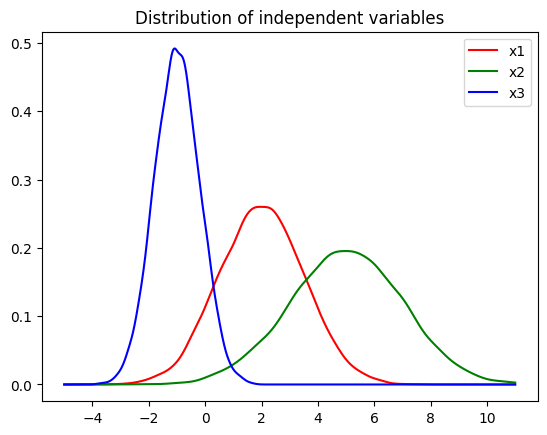

In [5]:
colors = ["red", "green", "blue"]
labels = ["x1", "x2", "x3"]
title = "Distribution of independent variables"

plot_density(observations, title, labels, colors)

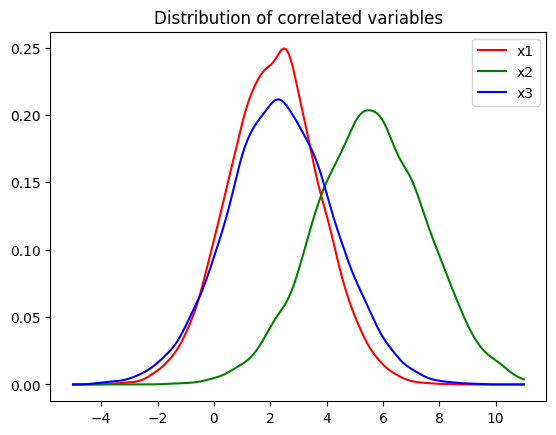

In [6]:
title = "Distribution of correlated variables"

plot_density(correlated_observations, title, labels, colors)

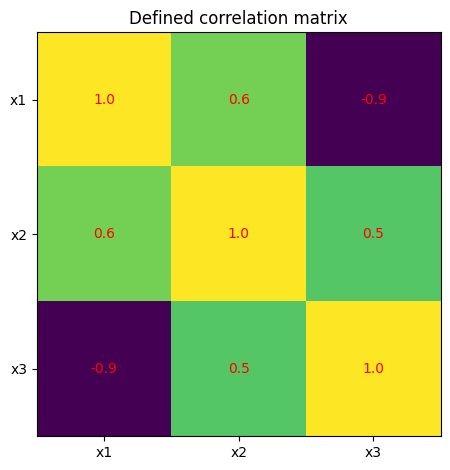

In [7]:
title = "Defined correlation matrix"

plot_heatmap(defined_correlation_matrix, title, labels, labels)

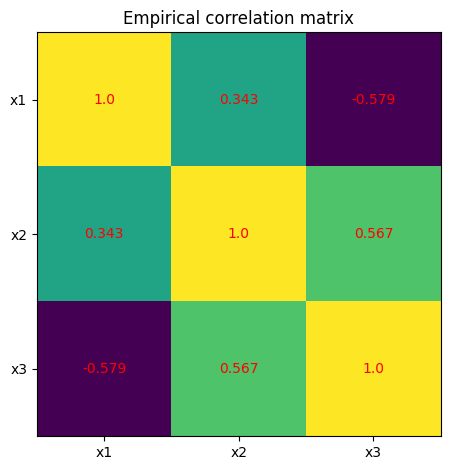

In [8]:
empirical_correlation_matrix = compute_correlation_matrix(
    correlated_observations)
labels = ["x1", "x2", "x3"]
title = "Empirical correlation matrix"

plot_heatmap(empirical_correlation_matrix, title, labels, labels)

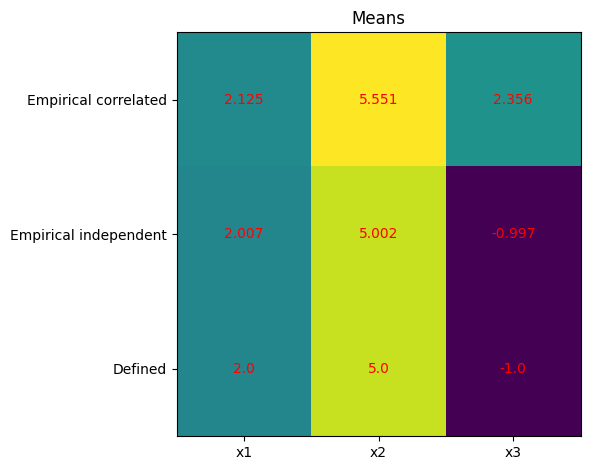

In [9]:
empirical_correlated_mean = compute_mean(correlated_observations)
empirical_mean = compute_mean(observations=observations)
means = np.vstack([empirical_correlated_mean, empirical_mean, defined_means])

title = "Means"
x_labels = ["x1", "x2", "x3"]
y_labels = ["Empirical correlated", "Empirical independent", "Defined"]

plot_heatmap(means, title, x_labels, y_labels)

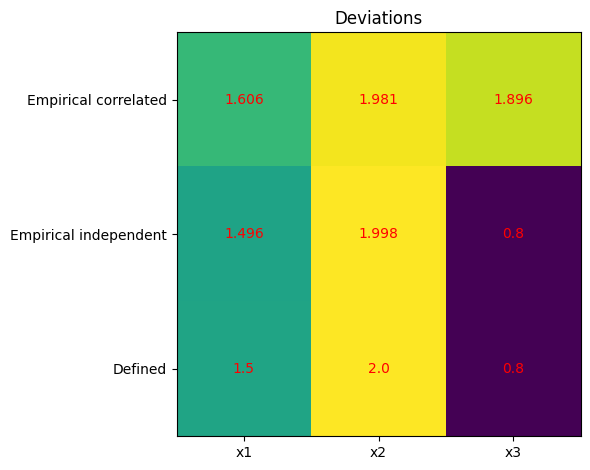

In [10]:
empirical_correlated_deviations = compute_deviation(correlated_observations)
empirical_deviations = compute_deviation(observations=observations)
deviations = np.vstack([
    empirical_correlated_deviations, 
    empirical_deviations, 
    defined_deviations
])

title = "Deviations"
x_labels = ["x1", "x2", "x3"]
y_labels = ["Empirical correlated", "Empirical independent", "Defined"]

plot_heatmap(deviations, title, x_labels, y_labels)